In [1]:
import face_recognition
import os
import numpy as np

# 함수 만들기

### 이미지 파일에서 얼굴 영역을 가져오는 함수

In [2]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

### 얼굴영역으로부터 얼굴 임베팅 벡터를 구하는 함수

In [3]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

### 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [4]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0: 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

### 이미지 사이의 임베딩 벡터 거리를 구하는 함수

In [5]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [6]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [7]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(1, top):
        if sorted_faces[i]:
            print('순위 {}  이름 : {}  거리 : {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    return sorted_faces, sort_key_func

# 결과

In [8]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/image/'
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image/'

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)

In [10]:
original_image_name = '정재형'

In [11]:
sorted_faces, key = get_nearest_face(original_image_name)

순위 1  이름 : 이봉원  거리 : 0.4984238340891752
순위 2  이름 : 이종석  거리 : 0.5385224039908036
순위 3  이름 : 이제훈  거리 : 0.5559407851214171
순위 4  이름 : 문채원  거리 : 0.5569386853708116
순위 5  이름 : 임시완  거리 : 0.5992006715619206


In [12]:
original_image = image_path + original_image_name + '.jpg'

In [13]:
nearest_image = image_path + sorted_faces[1][0] + '.jpg'

---

# 결과 시각화

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import cv2

In [15]:
img_o = Image.open(original_image)
img_n = Image.open(nearest_image)

cropped_o = get_cropped_face(original_image)
cropped_n = get_cropped_face(nearest_image)

a = min(cropped_o.shape[0], cropped_n.shape[0])
b = min(cropped_o.shape[1], cropped_n.shape[1])

In [16]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size= 2 * a)

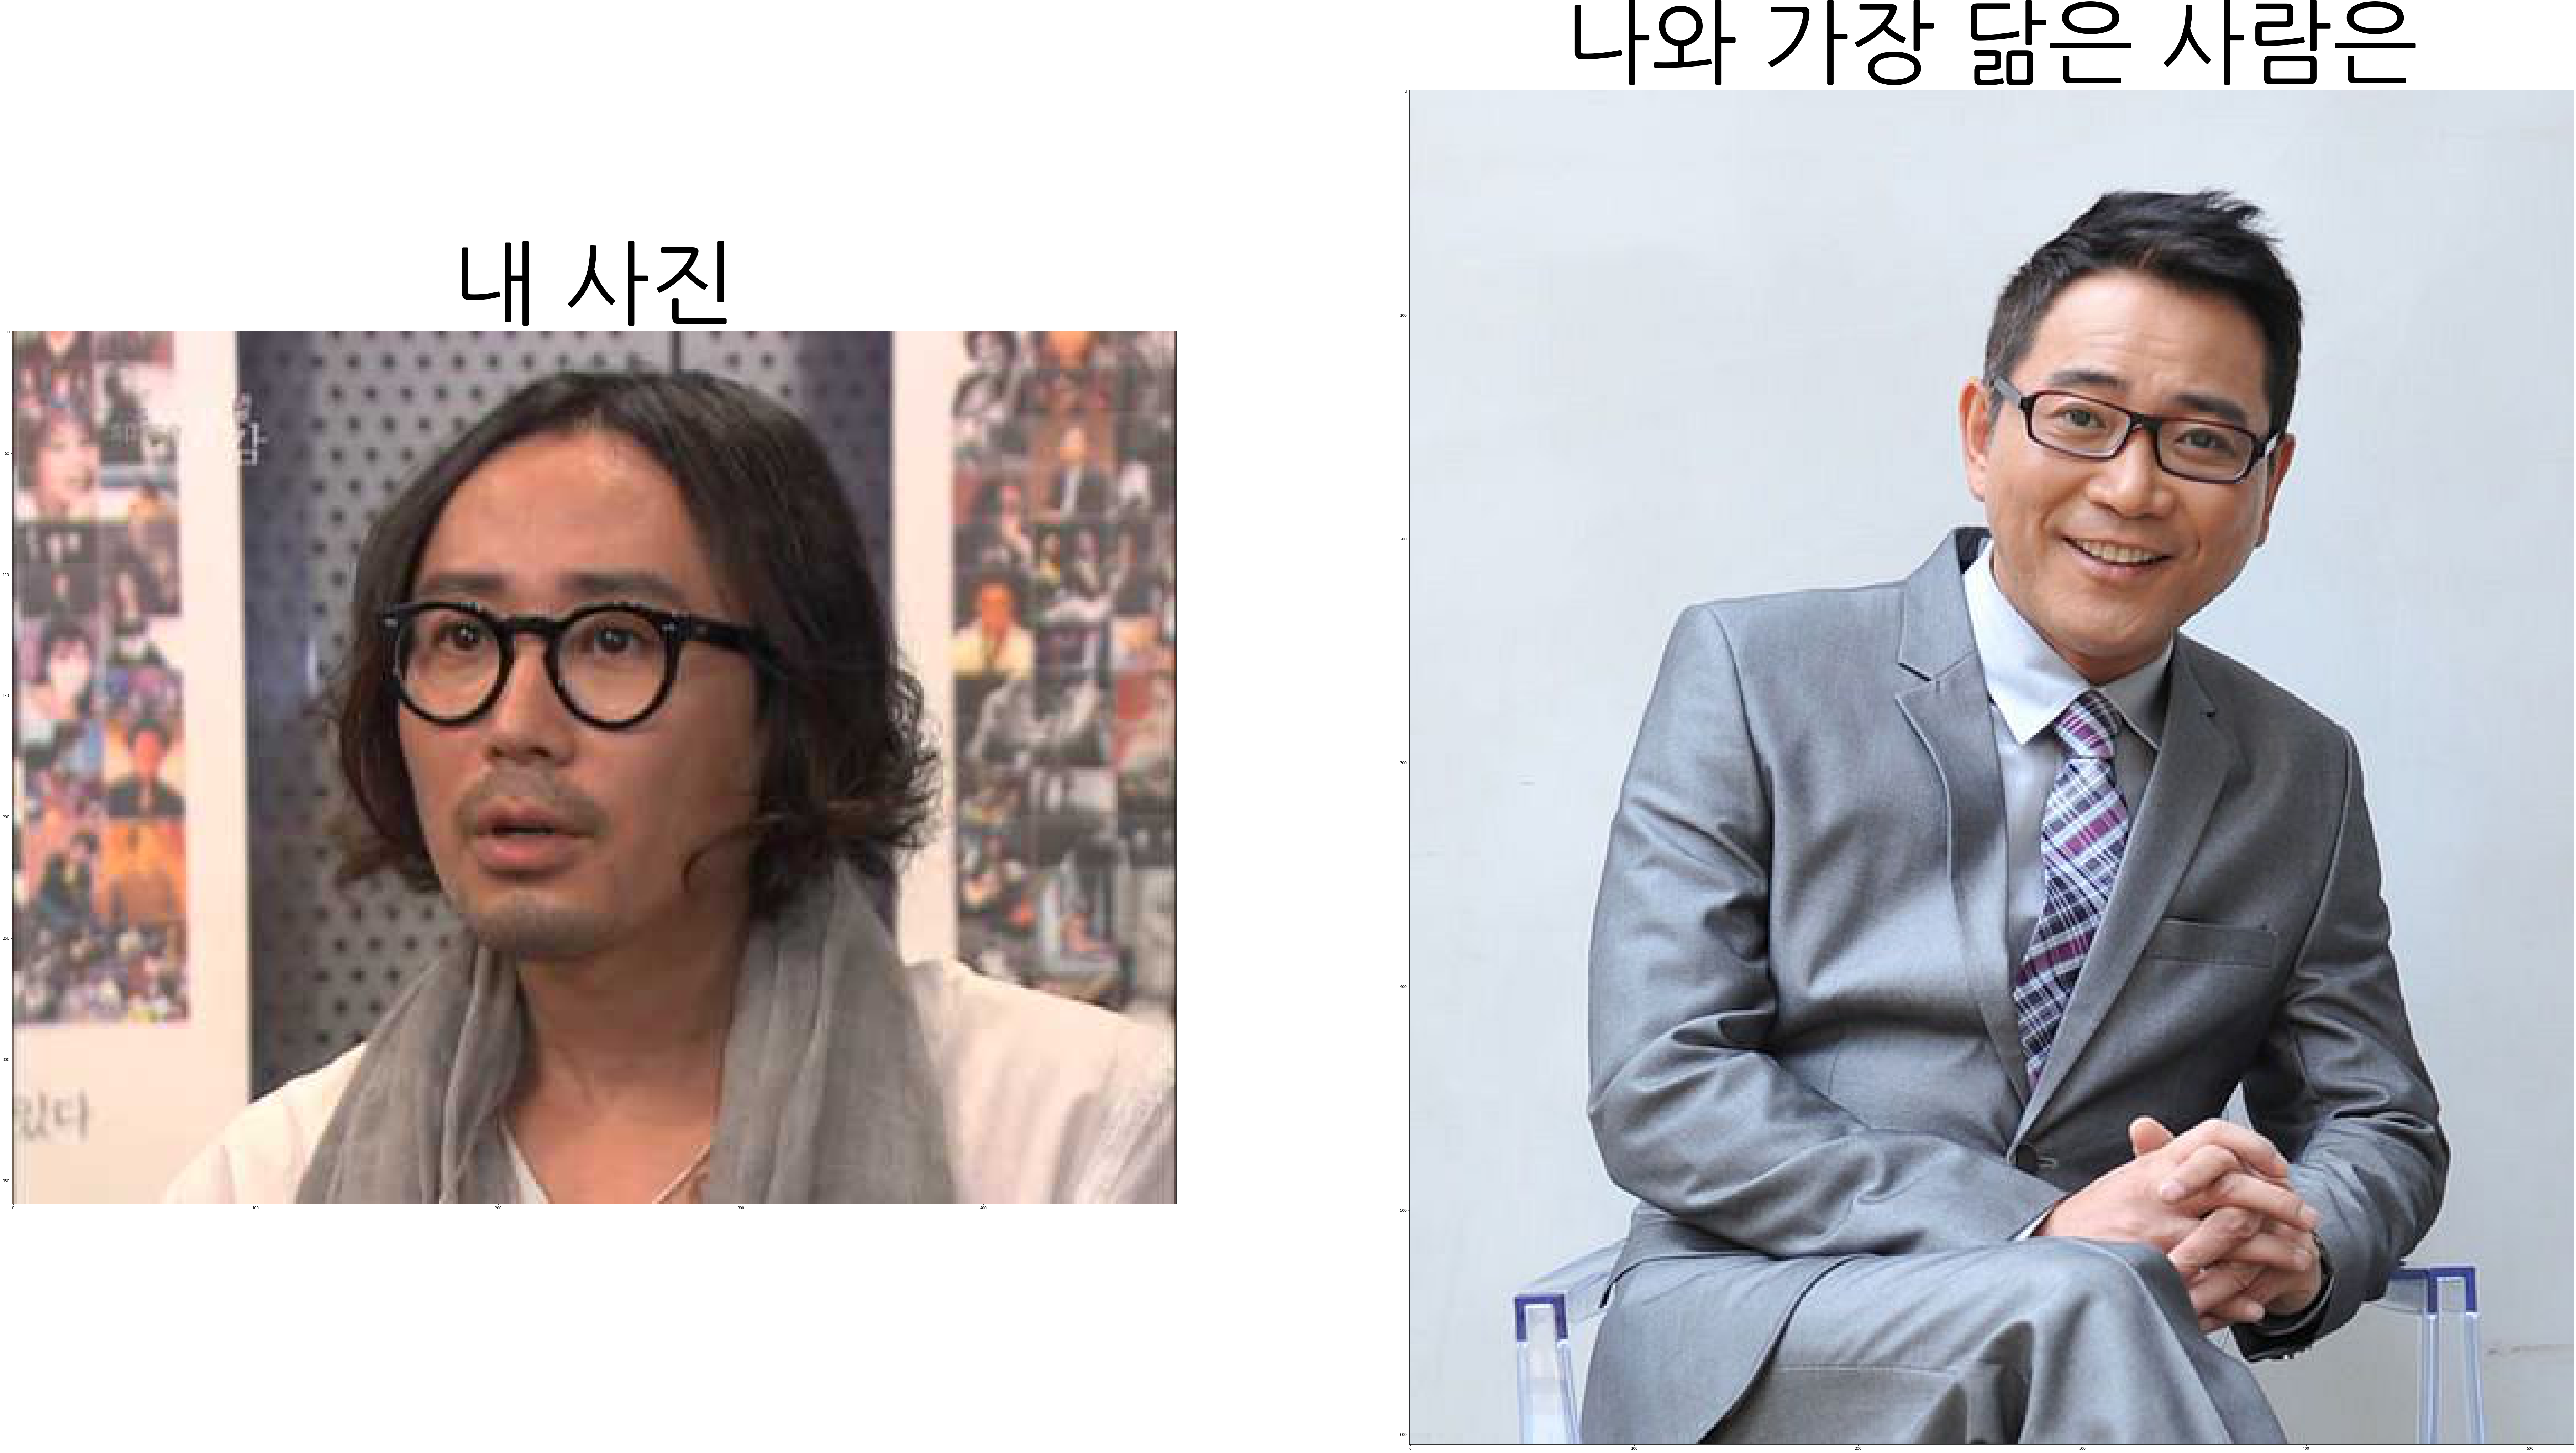

In [17]:
plt.figure(figsize=(a, b))

plt.subplot(1,2,1)
plt.title('내 사진', fontproperties=font_name)
plt.imshow(img_o)

plt.subplot(1,2,2)
plt.title('나와 가장 닮은 사람은', fontproperties=font_name)
plt.imshow(img_n)

plt.show()

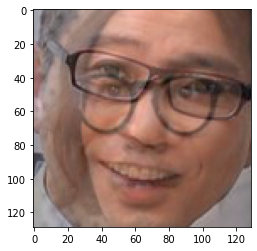

In [18]:
cropped_o = cv2.resize(cropped_o, (a, b))
cropped_n = cv2.resize(cropped_n, (a, b))

plt.imshow(cropped_o)
plt.imshow(cropped_n, alpha = 0.5)
plt.show()

---

가장 가까운 임베딩 거리 : 0.4984238340891752   
0.5 이내의 닮은 연예인을 찾고 시각화 해보았습니다.   